In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import glob
import cv2
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import *

In [2]:
imgs=glob.glob('Img/*')

In [3]:
df = pd.read_csv("./english.csv")
df.head(5)

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [4]:
imgs[:3]

['Img\\img001-001.png', 'Img\\img001-002.png', 'Img\\img001-003.png']

In [5]:
# Sorting image paths
new_imgs = sorted(imgs)

# Listing labels
labels = df['label'].tolist()

# Reading images and preprocessing
new_data = []
for i in new_imgs:
    # Read image
    img = cv2.imread(i, 1)
    # Resize image
    img = cv2.resize(img, (64, 64))
    # Append to new_data list
    new_data.append(img)
# Convert new_data to numpy array
new_data = np.array(new_data)

# Convert labels to numpy array
labels = np.array(labels)

# Encode labels
Encoder = LabelEncoder()
labels = Encoder.fit_transform(labels)

# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(new_data, labels, test_size=0.2, random_state=42)

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
model = Sequential()
model.add(Conv2D(1024,(5,5),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(512,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(512,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='sigmoid'))
model.add(Dense(62,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=2,validation_split = 0.2)

Epoch 1/2
69/69 ━━━━━━━━━━━━━━━━━━━━ 283s 4s/step - accuracy: 0.0155 - loss: 4.2929 - val_accuracy: 0.0147 - val_loss: 4.2383
Epoch 2/2
69/69 ━━━━━━━━━━━━━━━━━━━━ 269s 4s/step - accuracy: 0.0136 - loss: 4.2185 - val_accuracy: 0.0128 - val_loss: 4.2035


In [7]:
model.evaluate(test_images,test_labels)

22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.0130 - loss: 4.2145


[4.199807643890381, 0.013196481391787529]

In [8]:
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, y_pred_labels)
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')
f1 = f1_score(test_labels, y_pred_labels, average='weighted')
confusion_mat = confusion_matrix(test_labels, y_pred_labels)

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step
Accuracy: 0.013196480938416423
Precision: 0.000174147109157988
Recall: 0.013196480938416423
F1 Score: 0.0003437578247344365
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
# Calculate precision and recall
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')

# Print precision and recall
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.000174147109157988
Recall: 0.013196480938416423


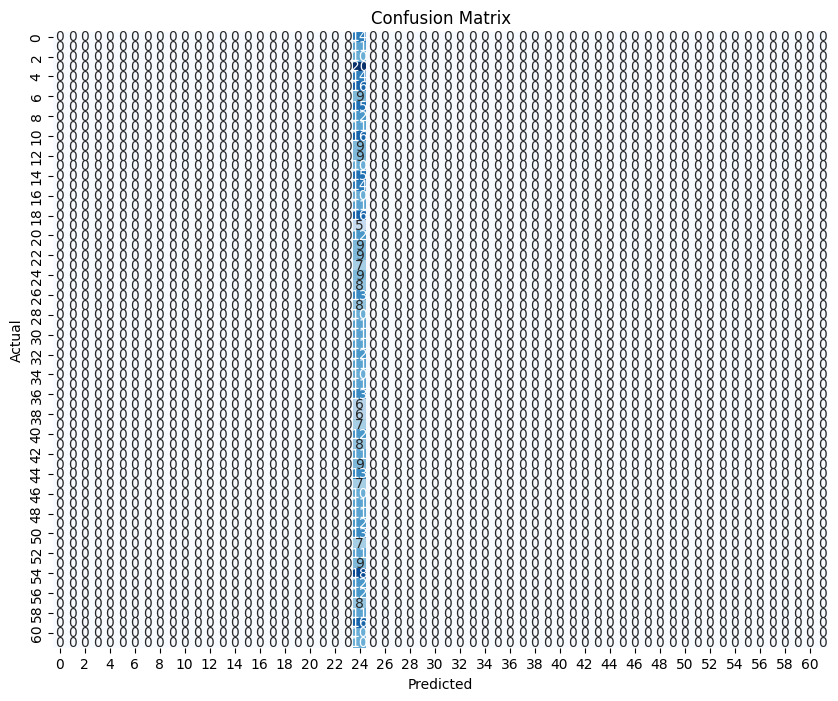

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


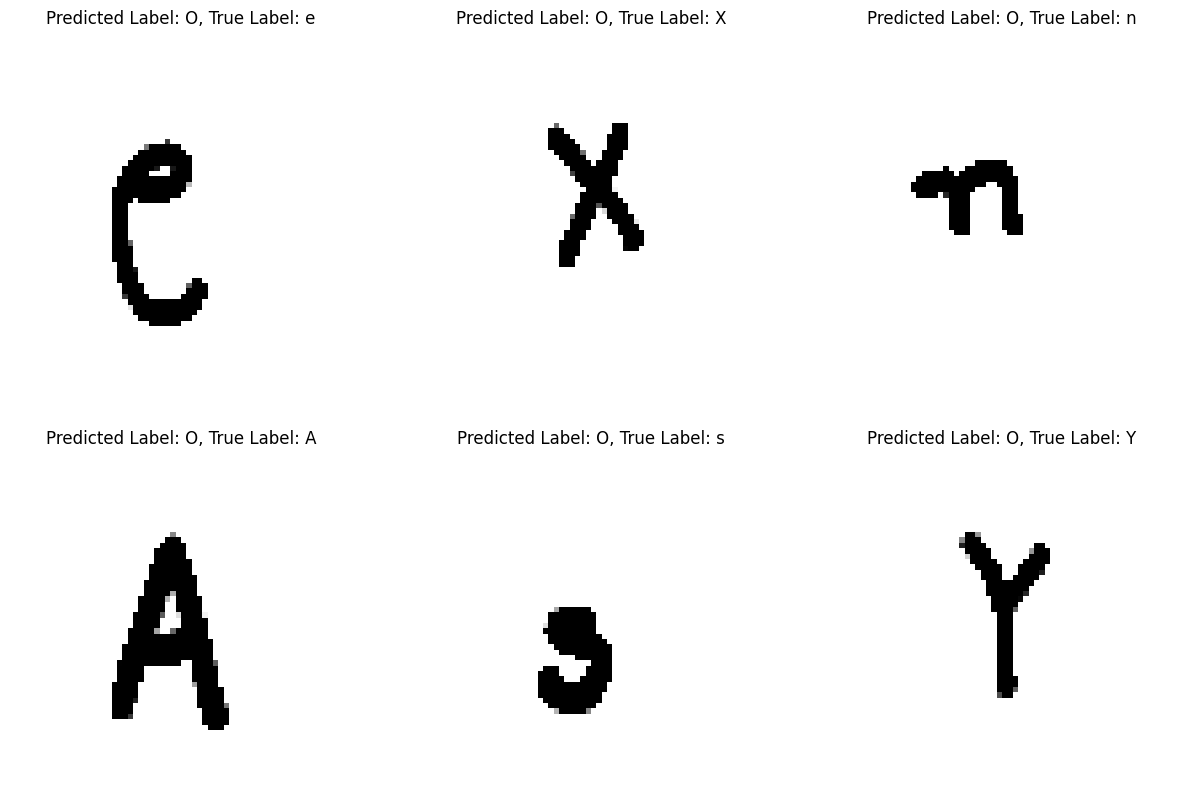

In [11]:
import random

# Randomly select 6 indices from the test set
random_indices = random.sample(range(len(test_images)), 6)

# Predict probabilities for each class for the randomly selected images
y_pred_probs = model.predict(test_images[random_indices])

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Decode the predicted labels
y_pred_labels_decoded = Encoder.inverse_transform(y_pred_labels)

# Decode the true labels
y_true_labels_decoded = Encoder.inverse_transform(test_labels[random_indices])

# Display the randomly selected test images along with their predicted and true labels
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 3, i+1)
    plt.imshow(test_images[idx])
    plt.title(f'Predicted Label: {y_pred_labels_decoded[i]}, True Label: {y_true_labels_decoded[i]}')
    plt.axis('off')
plt.show()